# Tarea 2
c) Los proyectos reales no sólo se componen de actividades que se deben cumpir, sino que también de recursos limiados que se deben compartir. Además, pueden haber reglas específicas para la asignación de dichos recursos. Implemente un procedimiento que permita implementar recursos compartidos entre actividades.

In [10]:
import random
import matplotlib.pyplot as plt
import simpy
import networkx as nx   

In [24]:
class ActivityProcess_wR(object):
    def __init__(self, env, name, tolba):
        self.env = env
        self.name = name
        self.tolba = tolba
        
    def waitup(self,node, myEvent):
        # PEM illustrating "waitevent"# wait for "myEvent" to occur
        evnt = [e.event for e in myEvent]
        yield self.env.all_of(evnt)
        with self.tolba.request() as req:
            print("Activity %s is requesting tolba in time %f" %(self.name, self.env.now))
            yield req
            
            print("The activating event(s) were %s a time %f" %([x.name for x in myEvent],self.env.now))
            tis = random.expovariate(1.0)
            yield self.env.timeout(tis)
            finishtime = self.env.now
            if finishtime > SANglobal.finishtime:
                SANglobal.finishtime = finishtime
            SANglobal.F.nodecomplete[node].event.succeed()

In [12]:
class ActivityProcess(object):
    def __init__(self, env, name):
        self.env = env
        self.name = name
        
    def waitup(self,node, myEvent):
        # PEM illustrating "waitevent"# wait for "myEvent" to occur
        evnt = [e.event for e in myEvent]
        yield self.env.all_of(evnt)
        print("The activating event(s) were %s and time %f" %([x.name for x in myEvent], self.env.now))
        tis = random.expovariate(1.0)
        yield self.env.timeout(tis)
        finishtime = self.env.now
        if finishtime > SANglobal.finishtime:
            SANglobal.finishtime = finishtime
        SANglobal.F.nodecomplete[node].event.succeed()

In [13]:
class StartSignaller(object):
    # here we just schedule some events to fire
    def __init__(self, env, name, sEvent):
        self.env = env
        self.name = name
        self.sEvent = sEvent
        self.env.process(self.startSignals())
        
    def startSignals(self):
        yield self.env.timeout(0)
        self.sEvent.event.succeed()

In [14]:
class CustomEvent(object):
    def __init__(self,env, name):
        self.name = name
        self.env = env
        self.event = self.env.event()        

Vamos a modificar el grafo para que b y c no dependan el uno del otro, sino que pidan el mismo recurso, y para hacerlo más interesante agregaremos otro nodo, que sólo necesita el recurso y depende de `a`.

In [16]:
class SANglobal:
    F = nx.DiGraph()
    a = 0
    b = 1
    c = 2
    d = 3
    e = 4
    inTo = 0
    F.add_nodes_from([a, b, c, d, e])
    F.add_edges_from([(a,b), (a,c), (b,d), (c,d), (a,e)])
    finishtime = 0
    recurso = (b,d,e)

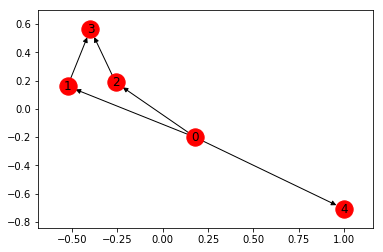

In [20]:
nx.draw_networkx(SANglobal.F)
plt.show()

In [25]:
finishtimes = []
for rep in range(1000):
    SANglobal.finishtime = 0
    env = simpy.Environment() #ambiente de simpy creado
    tolba = simpy.Resource(env, capacity=1) #Creamos nuestro recurso tolba con capacidad 1
    
    SANglobal.F.nodecomplete= []
    for i in range(len(SANglobal.F.nodes())):
        eventname = 'Complete %1d' % i
        SANglobal.F.nodecomplete.append(CustomEvent(env,eventname))
    #SANglobal.F.nodecomplete

    activitynode = []
    for i in range(len(SANglobal.F.nodes())):
        activityname = 'Activity %1d' % i
        if i in SANglobal.recurso:
            activitynode.append(ActivityProcess_wR(env,activityname,tolba))
        else:
            activitynode.append(ActivityProcess(env,activityname))
        
    for i in range(len(SANglobal.F.nodes())):
        if i is not SANglobal.inTo:
            prenodes = SANglobal.F.predecessors(i)
            preevents = [SANglobal.F.nodecomplete[j] for j in prenodes]
            env.process(activitynode[i].waitup(i,preevents))
            
    startevent = CustomEvent(env,'Start')
    sstart = StartSignaller(env,'Signal',startevent).startSignals()
    env.process(activitynode[SANglobal.inTo].waitup(SANglobal.inTo, [startevent]))
    
    env.run(until=50)
    finishtimes.append(SANglobal.finishtime)

The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 0.008304
The activating event(s) were ['Complete 0'] and time 0.008304
Activity Activity 4 is requesting tolba in time 0.008304
The activating event(s) were ['Complete 0'] and time 0.008304
The activating event(s) were ['Complete 0'] and time 0.310609
Activity Activity 3 is requesting tolba in time 0.675002
The activating event(s) were ['Complete 1', 'Complete 2'] and time 0.675002
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 0.039846
The activating event(s) were ['Complete 0'] and time 0.039846
Activity Activity 4 is requesting tolba in time 0.039846
The activating event(s) were ['Complete 0'] and time 0.039846
Activity Activity 3 is requesting tolba in time 1.407509
The activating event(s) were ['Complete 0'] and time 1.407509
The activating event(s) were ['Complete 1', 'Complete 2'] and time 2.841004
The activating event

Activity Activity 1 is requesting tolba in time 2.270463
The activating event(s) were ['Complete 0'] and time 2.270463
Activity Activity 4 is requesting tolba in time 2.270463
The activating event(s) were ['Complete 0'] and time 2.270463
Activity Activity 3 is requesting tolba in time 3.103353
The activating event(s) were ['Complete 0'] and time 3.103353
The activating event(s) were ['Complete 1', 'Complete 2'] and time 3.229317
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 0.040002
The activating event(s) were ['Complete 0'] and time 0.040002
Activity Activity 4 is requesting tolba in time 0.040002
The activating event(s) were ['Complete 0'] and time 0.040002
The activating event(s) were ['Complete 0'] and time 0.851394
Activity Activity 3 is requesting tolba in time 1.338958
The activating event(s) were ['Complete 1', 'Complete 2'] and time 1.338958
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 

The activating event(s) were ['Complete 0'] and time 0.736192
Activity Activity 4 is requesting tolba in time 0.736192
The activating event(s) were ['Complete 0'] and time 0.736192
The activating event(s) were ['Complete 0'] and time 1.067600
Activity Activity 3 is requesting tolba in time 4.755437
The activating event(s) were ['Complete 1', 'Complete 2'] and time 4.755437
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 4.311380
The activating event(s) were ['Complete 0'] and time 4.311380
Activity Activity 4 is requesting tolba in time 4.311380
The activating event(s) were ['Complete 0'] and time 4.311380
The activating event(s) were ['Complete 0'] and time 5.387810
Activity Activity 3 is requesting tolba in time 8.118132
The activating event(s) were ['Complete 1', 'Complete 2'] and time 8.118132
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 0.160015
The activating event

The activating event(s) were ['Complete 0'] and time 1.731537
The activating event(s) were ['Complete 0'] and time 2.914015
Activity Activity 3 is requesting tolba in time 3.602743
The activating event(s) were ['Complete 1', 'Complete 2'] and time 5.127919
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 0.395593
The activating event(s) were ['Complete 0'] and time 0.395593
Activity Activity 4 is requesting tolba in time 0.395593
The activating event(s) were ['Complete 0'] and time 0.395593
The activating event(s) were ['Complete 0'] and time 0.509623
Activity Activity 3 is requesting tolba in time 0.950413
The activating event(s) were ['Complete 1', 'Complete 2'] and time 1.926156
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 0.107823
The activating event(s) were ['Complete 0'] and time 0.107823
Activity Activity 4 is requesting tolba in time 0.107823
The activating event

Activity Activity 1 is requesting tolba in time 2.201467
The activating event(s) were ['Complete 0'] and time 2.201467
Activity Activity 4 is requesting tolba in time 2.201467
The activating event(s) were ['Complete 0'] and time 2.201467
The activating event(s) were ['Complete 0'] and time 2.373712
Activity Activity 3 is requesting tolba in time 2.502974
The activating event(s) were ['Complete 1', 'Complete 2'] and time 2.503013
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 0.085428
The activating event(s) were ['Complete 0'] and time 0.085428
Activity Activity 4 is requesting tolba in time 0.085428
The activating event(s) were ['Complete 0'] and time 0.085428
Activity Activity 3 is requesting tolba in time 1.352470
The activating event(s) were ['Complete 0'] and time 1.352470
The activating event(s) were ['Complete 1', 'Complete 2'] and time 3.263727
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 

The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 0.829272
The activating event(s) were ['Complete 0'] and time 0.829272
Activity Activity 4 is requesting tolba in time 0.829272
The activating event(s) were ['Complete 0'] and time 0.829272
Activity Activity 3 is requesting tolba in time 2.820582
The activating event(s) were ['Complete 0'] and time 2.820582
The activating event(s) were ['Complete 1', 'Complete 2'] and time 3.176755
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 0.103696
The activating event(s) were ['Complete 0'] and time 0.103696
Activity Activity 4 is requesting tolba in time 0.103696
The activating event(s) were ['Complete 0'] and time 0.103696
The activating event(s) were ['Complete 0'] and time 1.231060
Activity Activity 3 is requesting tolba in time 2.053842
The activating event(s) were ['Complete 1', 'Complete 2'] and time 2.053842
The activating event

The activating event(s) were ['Complete 0'] and time 2.522251
Activity Activity 4 is requesting tolba in time 2.522251
The activating event(s) were ['Complete 0'] and time 2.522251
Activity Activity 3 is requesting tolba in time 3.690581
The activating event(s) were ['Complete 0'] and time 3.690581
The activating event(s) were ['Complete 1', 'Complete 2'] and time 4.337031
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 0.423694
The activating event(s) were ['Complete 0'] and time 0.423694
Activity Activity 4 is requesting tolba in time 0.423694
The activating event(s) were ['Complete 0'] and time 0.423694
Activity Activity 3 is requesting tolba in time 0.799526
The activating event(s) were ['Complete 0'] and time 0.799526
The activating event(s) were ['Complete 1', 'Complete 2'] and time 1.914865
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 0.170058
The activating event

The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 1.560197
The activating event(s) were ['Complete 0'] and time 1.560197
Activity Activity 4 is requesting tolba in time 1.560197
The activating event(s) were ['Complete 0'] and time 1.560197
The activating event(s) were ['Complete 0'] and time 1.762614
Activity Activity 3 is requesting tolba in time 1.858596
The activating event(s) were ['Complete 1', 'Complete 2'] and time 2.199973
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 3.568725
The activating event(s) were ['Complete 0'] and time 3.568725
Activity Activity 4 is requesting tolba in time 3.568725
The activating event(s) were ['Complete 0'] and time 3.568725
Activity Activity 3 is requesting tolba in time 8.633034
The activating event(s) were ['Complete 0'] and time 8.633034
The activating event(s) were ['Complete 1', 'Complete 2'] and time 9.965260
The activating event

Activity Activity 3 is requesting tolba in time 0.933289
The activating event(s) were ['Complete 0'] and time 0.933289
The activating event(s) were ['Complete 1', 'Complete 2'] and time 1.105736
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 0.815313
The activating event(s) were ['Complete 0'] and time 0.815313
Activity Activity 4 is requesting tolba in time 0.815313
The activating event(s) were ['Complete 0'] and time 0.815313
Activity Activity 3 is requesting tolba in time 2.720519
The activating event(s) were ['Complete 0'] and time 2.720519
The activating event(s) were ['Complete 1', 'Complete 2'] and time 3.585930
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 0.408835
The activating event(s) were ['Complete 0'] and time 0.408835
Activity Activity 4 is requesting tolba in time 0.408835
The activating event(s) were ['Complete 0'] and time 0.408835
Activity Activity 3 

The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 1.812916
The activating event(s) were ['Complete 0'] and time 1.812916
Activity Activity 4 is requesting tolba in time 1.812916
The activating event(s) were ['Complete 0'] and time 1.812916
Activity Activity 3 is requesting tolba in time 4.652952
The activating event(s) were ['Complete 0'] and time 4.652952
The activating event(s) were ['Complete 1', 'Complete 2'] and time 4.961742
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 0.944644
The activating event(s) were ['Complete 0'] and time 0.944644
Activity Activity 4 is requesting tolba in time 0.944644
The activating event(s) were ['Complete 0'] and time 0.944644
The activating event(s) were ['Complete 0'] and time 1.230742
Activity Activity 3 is requesting tolba in time 1.625760
The activating event(s) were ['Complete 1', 'Complete 2'] and time 2.218333
The activating event

The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 1.068598
The activating event(s) were ['Complete 0'] and time 1.068598
Activity Activity 4 is requesting tolba in time 1.068598
The activating event(s) were ['Complete 0'] and time 1.068598
Activity Activity 3 is requesting tolba in time 2.205442
The activating event(s) were ['Complete 0'] and time 2.205442
The activating event(s) were ['Complete 1', 'Complete 2'] and time 2.910031
The activating event(s) were ['Start'] and time 0.000000
Activity Activity 1 is requesting tolba in time 0.747567
The activating event(s) were ['Complete 0'] and time 0.747567
Activity Activity 4 is requesting tolba in time 0.747567
The activating event(s) were ['Complete 0'] and time 0.747567
The activating event(s) were ['Complete 0'] and time 0.826123
Activity Activity 3 is requesting tolba in time 3.041334
The activating event(s) were ['Complete 1', 'Complete 2'] and time 4.902824
The activating event

In [ ]:
plt.hist(finishtimes, bins = 30, density = True, cumulative=True,label='Acumulado')  
plt.hist(finishtimes, bins = 30, density = True, cumulative=False,label='Distribución')
plt.title('Tiempos de completación')
plt.ylabel('Probabilidad')
plt.xlabel("Tiempo de completación")
plt.legend(loc='upper right')
plt.show